<a href="https://colab.research.google.com/github/yeesem/Time-Series-Data-Analysis/blob/main/Prophet_Rossmann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install prophet

In [2]:
from prophet import Prophet

In [3]:
import numpy as np
import pandas as pd
import matplotlib as plt

In [ ]:
!wget -nc https://lazyprogrammer.me/course_files/timeseries/rossmann_train.csv

In [11]:
df = pd.read_csv("rossmann_train.csv",low_memory = False)

In [12]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


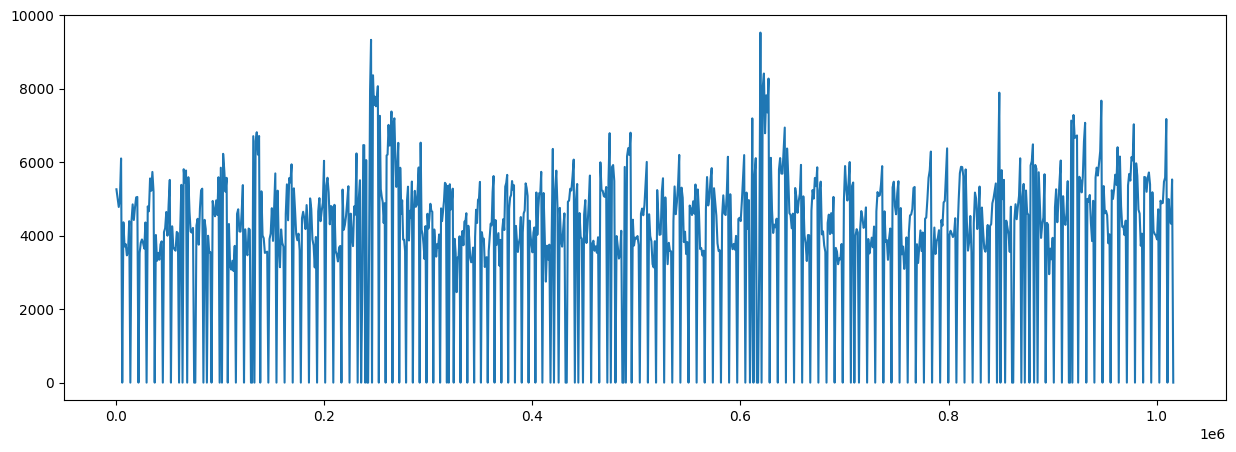

In [13]:
df[df['Store'] == 1]['Sales'].plot(figsize = (15,5));

In [14]:
(df[df['Store'] == 1]['Sales'] == 0).sum()

161

In [19]:
(df[df['Store'] == 1]['Open'] == 0).sum()

161

In [17]:
store1 = df[df['Store'] == 1].copy()

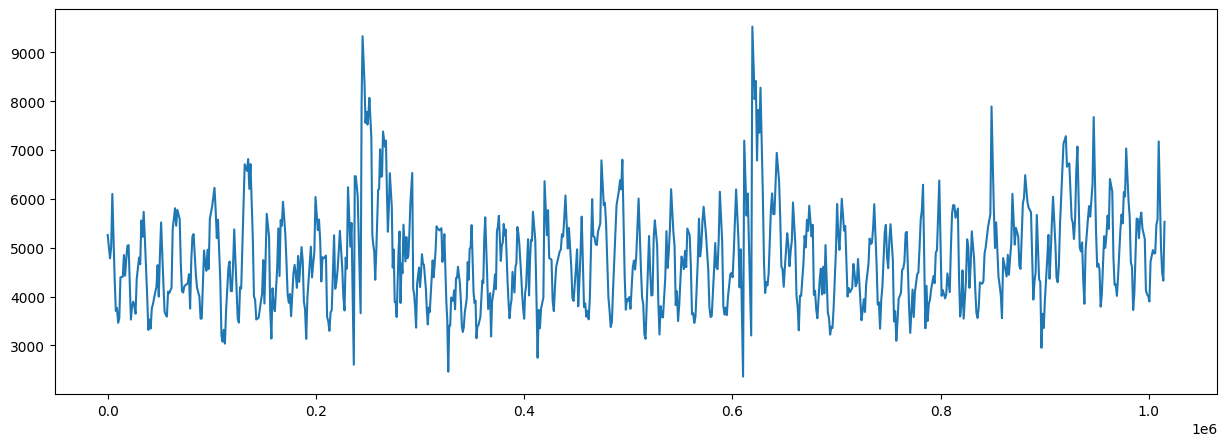

In [18]:
#No need to calculate the time series when the store is closed
store1[store1['Open'] > 0]['Sales'].plot(figsize = (15,5));

In [23]:
sales0 = store1[store1['Sales'] == 0].index
customer0 = store1[store1['Customers'] == 0].index
store_closed = store1[store1['Open'] == 0].index
print(np.all(sales0 == customer0))
print(np.all(store_closed == customer0))

True
True


In [21]:
store1.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1115,1,4,2015-07-30,5020,546,1,1,0,1
2230,1,3,2015-07-29,4782,523,1,1,0,1
3345,1,2,2015-07-28,5011,560,1,1,0,1
4460,1,1,2015-07-27,6102,612,1,1,0,1


In [24]:
store1['Date'] = pd.to_datetime(store1['Date'])